### Ben Christensen  - 1/30/2018 - Econ 213R Machine Learning 

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sqlite3
import json
import requests
import urllib.request

%matplotlib inline

# Data #1
## Trump first-year employment compared to past 20 years of employment

In this data visualization, I give a snapshot of a brief comparison of employment levels during Trump's first year and employment levels from 1997-2016.

In every case, "average" refers to the average value listed for that month in the 20 years leading up to Trump's first year in office.

In [2]:
data = pd.read_csv("employment.csv")
data.head()


,Series ID,Year,Period,Label,Value,1-Month % Change
0,CES0000000001,1997,M01,1997 Jan,121379,0.2
1,CES0000000001,1997,M02,1997 Feb,121684,0.3
2,CES0000000001,1997,M03,1997 Mar,121999,0.3
3,CES0000000001,1997,M04,1997 Apr,122291,0.2
4,CES0000000001,1997,M05,1997 May,122552,0.2


In [3]:
data.describe()

,Year,Value,1-Month % Change
count,252.000000,252.000000,252.000000
mean,2007.000000,134123.932540,0.080159
std,6.067351,5633.338281,0.168669
min,1997.000000,121379.000000,-0.600000
25%,2002.000000,130614.500000,0.000000
50%,2007.000000,132726.000000,0.100000
75%,2012.000000,137623.750000,0.200000
max,2017.000000,147380.000000,0.400000


There are 252 observations (12 months * 21 years)


Max and min employment levels:
Max = 147,380
Min = 121,379

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
Series ID           252 non-null object
Year                252 non-null int64
Period              252 non-null object
Label               252 non-null object
Value               252 non-null int64
1-Month % Change    252 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.9+ KB


No missing data

In [5]:
data.columns[data.isnull().any()]

Index([], dtype='object')

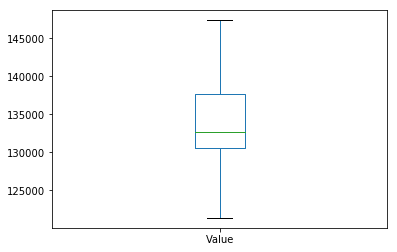

In [6]:
bbox = data['Value'].plot(kind='box')

In [7]:
q_df = data.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[.25]
q_df.loc['whisker_length'] = 1.5*q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,Year,Value,1-Month % Change
0.25,2002.0,130614.500,0.0
0.75,2012.0,137623.750,0.2
iqr,10.0,7009.250,0.2
whisker_length,15.0,10513.875,0.3
max_whisker,2027.0,148137.625,0.5
min_whisker,1987.0,120100.625,-0.3


All employment levels are within the whiskers (no outliers).

In [8]:
standard = StandardScaler()
values = np.array(data["Value"])

standard_values = standard.fit_transform([[i, float(value)] for i, value in enumerate(list(data["Value"]))])

In [9]:
data.describe(percentiles=[.01, .05, .95, .99])

,Year,Value,1-Month % Change
count,252.000000,252.000000,252.000000
mean,2007.000000,134123.932540,0.080159
std,6.067351,5633.338281,0.168669
min,1997.000000,121379.000000,-0.600000
1%,1997.000000,122147.920000,-0.549000
5%,1998.000000,124937.450000,-0.200000
50%,2007.000000,132726.000000,0.100000
95%,2016.000000,145239.750000,0.300000
99%,2017.000000,146872.390000,0.349000
max,2017.000000,147380.000000,0.400000


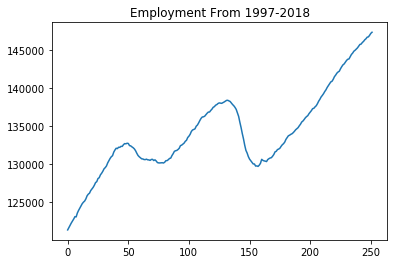

In [10]:
employment = list(data["Value"])
pre_Trump_employment = employment[:240]
pre_Trump_labels = list(data["Label"])[:240]
Trump_employment = employment[240:]
Trump_labels = list(data["Label"])[240:]

avg_employment = []
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Find the average employment for each month across 1997-2016
for i, month in enumerate(Months):
    _sum = 0
    for t in zip(pre_Trump_employment, pre_Trump_labels):
        if month in t[1]:
            _sum += t[0]
    avg_employment.append(_sum / 20)
    
plt.plot(employment)
plt.title("Employment From 1997-2018")
plt.show()

The following graphs compare the change in average employment over the course of the year (from 1997-2016) with the employment over the course of the first year of Trump's presidency. Notice that the axis is different between the two plots. This is because employment has been increasing across the entire period. However, I scale each graph using the midpoint method based on the average employment in that year. The interesting information is comparing the change in the two graphs.

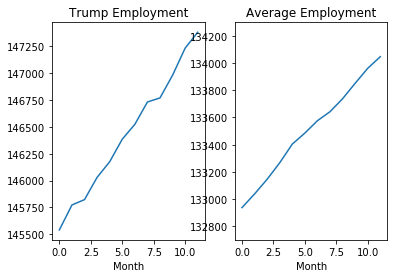

In [55]:
#Using the midpoint method, I make find the y-limits of the Average
#employment graph that will match the scale of the Trump employment
#graph.
x = (147250 - 145500) / ((145500 + 147250) / 2)
y = (134000+133000) / 2
z = x*y
#y + z/2 is the new upper limit for the avg. graph
#y - z/2 is the new lower limit for the avg. graph

plt.subplot(121)
plt.plot(Trump_employment)
plt.title("Trump Employment")
plt.xlabel("Month")
plt.subplot(122)
plt.plot(avg_employment)
plt.title("Average Employment")
plt.xlabel("Month")
plt.ylim(y-z/2, y+z/2)
plt.show()


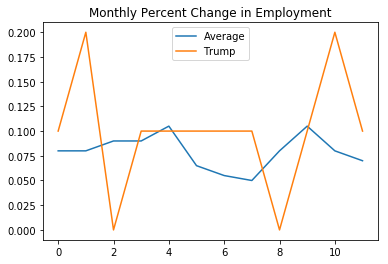

In [57]:
pre_Trump_change = list(data["1-Month % Change"])[:240]
Trump_change = list(data["1-Month % Change"])[240:]

avg_change = []
for i, month in enumerate(Months):
    _sum = 0
    for t in zip(pre_Trump_change, pre_Trump_labels):
        if month in t[1]:
            _sum += t[0]
    avg_change.append(_sum / 20)
    
plt.plot(avg_change, label="Average")
plt.plot(Trump_change, label="Trump")
plt.title("Monthly Percent Change in Employment")
plt.legend(loc= "upper center")
plt.show()

Now I compare the percent change in employment over the course of the year using the midpoint method. I compare the percent change in Trump's first year to the average percent change in the prior 20 years.

In [13]:
avg_increase = (avg_employment[-1] - avg_employment[0]) / ((avg_employment[-1] + avg_employment[0]) / 2)
Trump_increase = (Trump_employment[-1] - Trump_employment[0]) / ((Trump_employment[-1] + Trump_employment[0]) / 2)

print("Average percent change in employment: ", round(100*avg_increase, 2), "%", sep="")
print("Trump percent change in employment: ", round(100*Trump_increase, 2), "%", sep="")

Average percent change in employment: 0.83%
Trump percent change in employment: 1.26%


In conclusion, it seems clear that Trump's inauguration did not have an immediate negative impact on employment. There is some evidence it had a positive impact on employment. In further analysis I would like to remove the Great recession of 2008 and see how the results change. I would also like to study the trend occurring just prior Trump's first year in office.

Data Source: https://beta.bls.gov/dataViewer/view/timeseries/CES0000000001

# Data #2
## European Soccer Database

Using SQL and the European Soccer Database, I wanted to find the highest number of goals scored in a soccer match, and which teams scored them. I give the team, what country the team is from, and the date the high scores were made.

In [44]:
conn = sqlite3.connect("database.sqlite")
head_df = pd.read_sql_query("select * from Country;", conn)
head_df
cur = conn.cursor()

In [45]:
pd.read_sql_query("""select home_team_api_id, max(home_team_goal) from Match""", conn)




,home_team_api_id,max(home_team_goal)
0,8640,10


In [46]:
cur.execute("SELECT T.team_long_name, CR.name, M.date "
            "FROM Country as CR, Match as M, Team as T "
            "WHERE M.country_id == CR.id AND M.home_team_goal == 10 AND M.away_team_api_id == T.team_api_id;")
cur.fetchall()

[('Feyenoord', 'Netherlands', '2010-10-24 00:00:00'),
 ('Rayo Vallecano', 'Spain', '2015-12-20 00:00:00')]

In [47]:
pd.read_sql_query("""select away_team_api_id, max(away_team_goal) from Match""", conn)



,away_team_api_id,max(away_team_goal)
0,9847,9


In [48]:
cur.execute("SELECT T.team_long_name, CR.name, M.date "
            "FROM Country as CR, Match as M, Team as T "
            "WHERE M.country_id == CR.id AND M.away_team_goal == 9 AND M.away_team_api_id == T.team_api_id;")
cur.fetchall()

[('Paris Saint-Germain', 'France', '2016-03-13 00:00:00')]

Data Source: https://www.kaggle.com/hugomathien/soccer/data

# Data #3
## Population estimates for 1990-2000

I'm trying to read in text files from the US census. However, the data is in the form of bytes so I'm unsure how to manipulate it. The third object in each entry should be the populaiton number, but I can't access it as an integer.

In [114]:
#https://www2.census.gov/programs-surveys/popest/datasets/1990-2000/national/asrh/e9090rmp.txt
#https://www2.census.gov/programs-surveys/popest/datasets/1990-2000/national/asrh/e9091rmp.txt
    
#https://www2.census.gov/programs-surveys/popest/datasets/1990-2000/national/asrh/e9999rmp.txt
#https://www2.census.gov/programs-surveys/popest/datasets/1990-2000/national/asrh/e9900rmp.txt
#https://www2.census.gov/programs-surveys/popest/datasets/1990-2000/national/asrh/e0000rmp.txt
#https://www2.census.gov/programs-surveys/popest/datasets/1990-2000/national/asrh/e0001rmp.txt
    
entries = []
f = urllib.request.urlopen("https://www2.census.gov/programs-surveys/popest/datasets/1990-2000/national/asrh/e9090rmp.txt")
j = 0
lines = [line for line in f]
for i in range(612):
    entries.append(lines[j:j+3])
    j += 3
#population = sum([entry[12:21] for entry in entries])
print(type(entries[0][0]))
print(entries[0][0])



<class 'bytes'>
b'9P 41990999  248790925 121284188 127506737 102163005 106577945  14439402  16077514   1024828   1041719   3656953   3809559  11401617  10976922  91751437  96563875  13824966  15479132    884914    912114   3421254   3574694\r\n'
